# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [25]:
# Libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Your code here.
student_data = pd.DataFrame({'Age':[17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

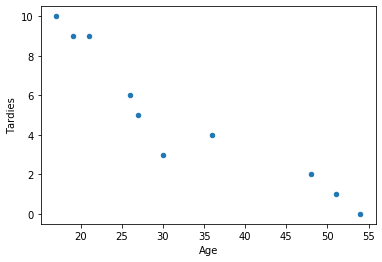

In [8]:
# Your code here.
student_data.plot.scatter('Age','Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [13]:
# Yes I can see a trend, is close to a linear inverse relation - the youger the age the higher the Tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
#correlation:
student_data.corr()
#np.corrcoef(student_data['Age'],student_data['Tardies'])

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [23]:
#covariance:
student_data.cov()
#np.cov(student_data['Age'],student_data['Tardies'])

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
"""
The correlation is quite close to 1 which proofs that the relation between Age and Tardies is close to linear,
and it's negative which proofs that the relation is inverse.
The covariance is also negative, confirming the inverse relation;
the absolute value is not much conlcusive because it's not normalized.
The correlation is the covariance normalized.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [65]:
# using linear regression:
x = student_data['Age']
y = student_data['Tardies']

slope, intercept, r_value, _, std_err = stats.linregress(x,y)
m = slope
b = intercept

print('m =',m)
print('b =',b)

m = -0.2428207709159808
b = 12.888803363135768


In [34]:
# model:
# y = m*x + b
# y = -0.243*x + 12.889
# the outcome variable is the y

Plot your regression model on your scatter plot.

Text(0, 0.5, 'Tardies')

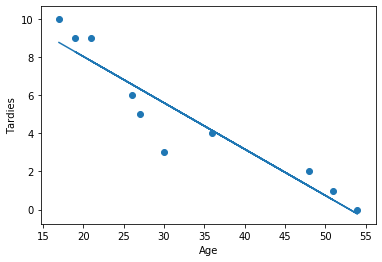

In [66]:
y = m*x + b
plt.plot(x,y)
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [49]:
print('std_err',std_err)
print('r_value',r_value)

std_err 0.03139728816158607
r_value -0.9391626886887121


In [50]:
"""
The model is a good representation of the data, because as we can see on the plot the line is passing close to all the points.
Also both the value of the std error (close to zero) and the value of r (close to 1) give confidence on the model.
So yes we can predict tardiness by age, when age increases tardiness decrease and vice-versa.
"""

'\nThe model is a good representation of the data, because as we can see on the plot the line is passing close to all the points.\nAlso both the value of the std error (close to zero) and the value of R (close to 1) give confidence on the model.\nSo yes we can predict tardiness by age, when age increases tardiness decrease and vice-versa.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [51]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [56]:
vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
"""
The most important variable to determine CO2 emissions is be the Fuel Barrels/Year
because it's the one with the highest correlation (0.986).
The least important one is the Year.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# using linear regression:
x = vehicles['Fuel Barrels/Year']
y = vehicles['CO2 Emission Grams/Mile']

slope, intercept, r_value, _, std_err = stats.linregress(x,y)
m = slope
b = intercept

print('m =',m)
print('b =',b)

m = 26.283625397470253
b = 12.4865208307574


In [ ]:
# model:
# y = m*x + b
# y = 26.3*x + 12.5

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [58]:
print('std_err',std_err)
print('r_value',r_value)

std_err 0.02328112378922747
r_value 0.9861886621428727


In [ ]:
"""
The most importante variables of the linear model are the slope (m) which gives the direction of the relation between x and y,
and the intercept (b) which gives the y value where the line crosses the x axis (x is zero).
In this case the slope is 26.3 degrees and when the Fuel Barrels/Year is zero the CO2 Emission Grams/Mile are 12.5
By the value of the std error (close to zero) and the value of r (close to 1) I'm very confident about the model.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [59]:
party = pd.DataFrame({'Invited':[1,3,4,6,8,9,11,14], 'Attended':[1,2,4,4,5,7,8,13]})
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [67]:
x = party['Invited']
y = party['Attended']
slope, intercept, r_value, _, std_err = stats.linregress(x,y)
m = slope
b = intercept
print('m =',m)
print('b =',b)
print('std_err',std_err)
print('r_value',r_value)

m = 0.8484848484848485
b = -0.43939393939393945
std_err 0.09380896778286217
r_value 0.9652303546573691


Text(0, 0.5, 'Attended')

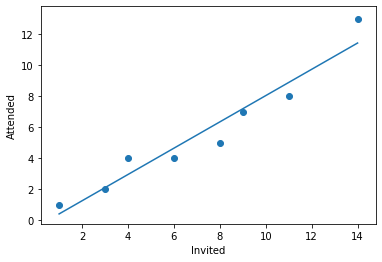

In [69]:
y = m*x + b
plt.plot(x,y)
plt.scatter(party['Invited'],party['Attended'])
plt.xlabel('Invited')
plt.ylabel('Attended')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
"""
The line fits well the majority of the points.
The relation between the variables is quite linear and direct/positive.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [71]:
# remove the last point which seems an outlier
party2 = pd.DataFrame({'Invited':[1,3,4,6,8,9,11], 'Attended':[1,2,4,4,5,7,8]})

In [72]:
# calculate new regression
x = party2['Invited']
y = party2['Attended']
slope, intercept, r_value, _, std_err = stats.linregress(x,y)
m = slope
b = intercept
print('m =',m)
print('b =',b)
print('std_err',std_err)
print('r_value',r_value)

m = 0.6842105263157895
b = 0.32330827067669166
std_err 0.07496206665031292
r_value 0.971278116825086


Text(0, 0.5, 'Attended')

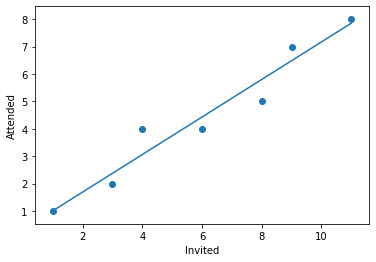

In [73]:
# new plot
y = m*x + b
plt.plot(x,y)
plt.scatter(party2['Invited'],party2['Attended'])
plt.xlabel('Invited')
plt.ylabel('Attended')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
"""
Without the outlier the line fits better all the points.
Also the values of std_error and r_value are better.
So removing the problematic point leads to a better representation model of the remaining data.
As a conclusion the more pepople invited to the party the more actually attend thr party, against what was inicially thought.
"""